In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import sys
from salt_pepper_m import salt_pepper
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [8]:
# Load a color image in grayscale
#img = cv2.imread('boat.jpg',0).astype(float)/255
img = cv2.imread('boat.jpg',0)

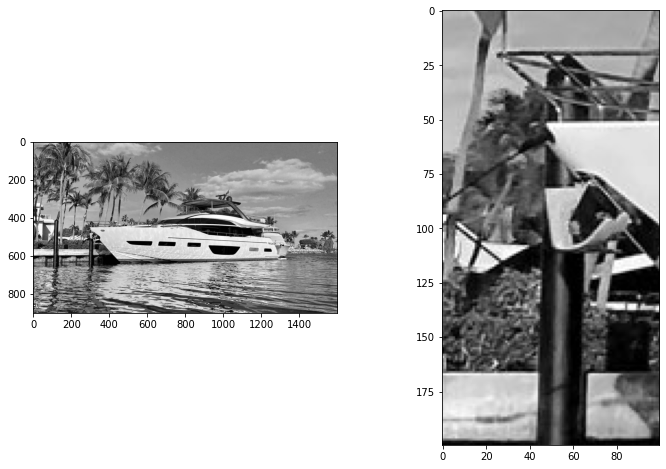

In [9]:
# Cut a template and show images
template=img[400:600,250:350]

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(template,cmap='gray')
plt.show()

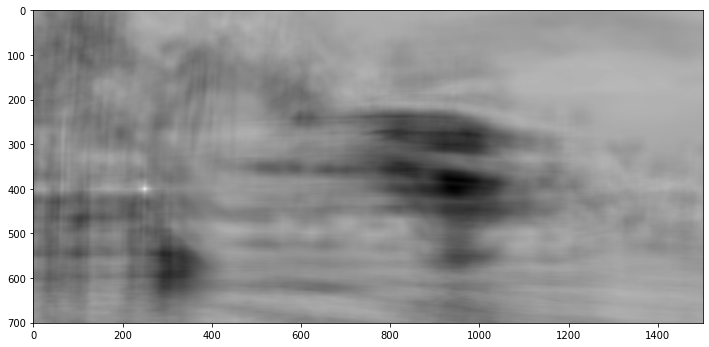

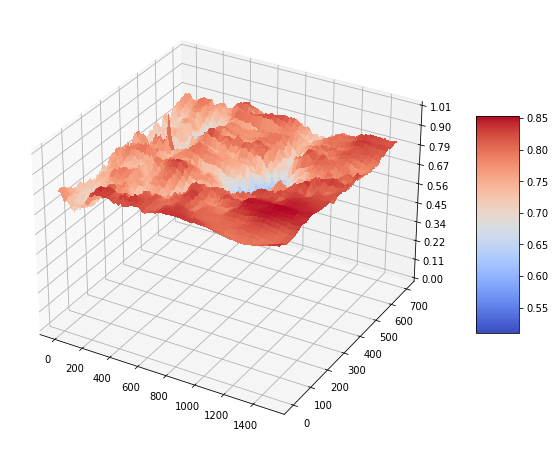

In [10]:
#Apply template matching

result=cv2.matchTemplate(img,template,method=cv2.TM_CCORR_NORMED)
plt.imshow(result,cmap='gray')
plt.show()

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot 3D surface
X = np.arange(result.shape[1])
Y = np.arange(result.shape[0])

X, Y = np.meshgrid(X, Y)


# Plot the surface.
surf = ax.plot_surface(X, Y, result, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


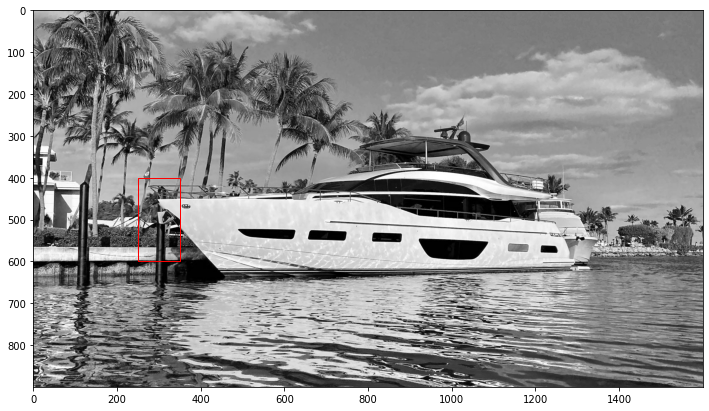

In [12]:
#Show in image
pos_templ=np.unravel_index(np.argmax(result),result.shape)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img,cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((pos_templ[1],pos_templ[0]), template.shape[1], template.shape[0], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
